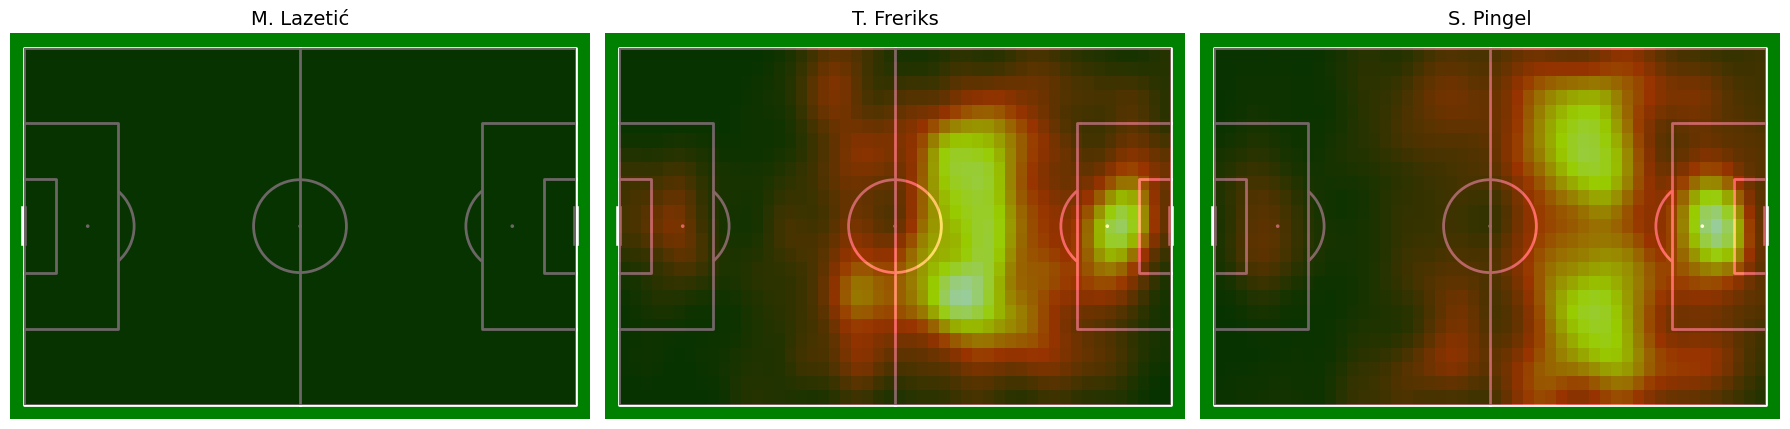

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from scipy.ndimage import gaussian_filter

# Load your data
df = pd.read_csv(r"C:\Users\Seamus-admin\Documents\GitHub\AC-Horsens-First-Team\Striker reports.csv")

# Define players of interest
players = ['M. Lazetić', 'T. Freriks', 'S. Pingel','S. Tedić']

# Drop rows with missing coordinates
df = df.dropna(subset=['x', 'y'])
df = df[~((df['x'] == 0) & (df['y'] == 0))]
df = df[~((df['x'].between(45, 55)) & (df['y'].between(45, 55)))]

# Setup the figure and pitch
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
pitch = Pitch(pitch_type='opta', pitch_color='green', line_color='white')

# Loop over each player
for ax, player in zip(axs, players):
    player_data = df[df['playerName'] == player]

    # Create bin statistics
    bin_statistic = pitch.bin_statistic(player_data['x'], player_data['y'], statistic='count', bins=(50, 25))

    # Smooth the statistic with a Gaussian filter
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], sigma=1.5)

    # Draw pitch and heatmap
    pitch.draw(ax=ax)
    pitch.heatmap(bin_statistic, ax=ax, cmap='hot', alpha=0.6)
    ax.set_title(player, fontsize=14)

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from tabulate import tabulate

# Load your data (replace with your actual file path or source)
df = pd.read_csv(r"C:\Users\Seamus-admin\Documents\GitHub\AC-Horsens-First-Team\Striker reports.csv")

# Rename columns if needed (these were named 321.0 and 322.0 in your sample)
df.rename(columns={'321.0': 'xG', '322.0': 'post_shot_xG'}, inplace=True)

minutes_played = {
    'M. Lazetić': 1171,
    'T. Freriks': 1423,
    'S. Pingel': 3462 + 865 + 628 + 167,  # Total = 4955
    'S. Tedić': 1146 + 171,
}

# Filter for the target players
target_players = list(minutes_played.keys())
player_stats = df[df['playerName'].isin(target_players)][['playerName', 'xG', 'post_shot_xG','sequence_xG']]

# Sum xG and post-shot xG per player
totals = player_stats.groupby('playerName')[['xG', 'post_shot_xG','sequence_xG']].sum()

# Add minutes and calculate per 90 stats
totals['minutes'] = totals.index.map(minutes_played)
totals['xG'] = (totals['xG'] / totals['minutes']) * 90
totals['post shot xG'] = (totals['post_shot_xG'] / totals['minutes']) * 90
totals['sequence xG'] = (totals['sequence_xG'] / totals['minutes']) * 90
totals['xG diff'] = totals['post shot xG'] - totals['xG']

# Reset index for display
per_90_summary = totals.reset_index()[['playerName', 'xG', 'post shot xG', 'xG diff','sequence xG']]
per_90_summary = per_90_summary.round(2)
# Display
print(tabulate(per_90_summary, headers='keys', tablefmt='grid', showindex=False))


+--------------+------+----------------+-----------+---------------+
| playerName   |   xG |   post shot xG |   xG diff |   sequence xG |
+==============+======+================+===========+===============+
| S. Pingel    | 0.5  |           0.44 |     -0.05 |          0.96 |
+--------------+------+----------------+-----------+---------------+
| S. Tedić     | 0.08 |           0.11 |      0.03 |          0.1  |
+--------------+------+----------------+-----------+---------------+
| T. Freriks   | 0.85 |           0.9  |      0.05 |          1.59 |
+--------------+------+----------------+-----------+---------------+
